# Inicializamos el programa importando las librerías necesarias

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

# Obteniendo los datos del Kaggle
## Recordar que es necesario subir el archivo jason de Kaggle para realizar este paso

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!kaggle competitions download -c udea-ai4eng-20241
!unzip udea-ai4eng-20241.zip

 94% 20.0M/21.2M [00:00<00:00, 105MB/s] 
100% 21.2M/21.2M [00:00<00:00, 99.1MB/s]
Archive:  udea-ai4eng-20241.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


## Por ahora solo cargaremos el train.csv, donde se realizará la exploración de los datos


In [ ]:
data = pd.read_csv('train.csv')
data

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,No,N,Si,Si,No,Primaria completa,bajo


# Exploración general

In [ ]:
print(data.info(),"\n")

# Podemos realizar una exploración un poco más organizada
# ¿Cuantos datos de ID (unicos) se encuentran registrados?
print("En total, tenemos:",data.ID.unique().shape[0],"estudiantes participando.\n")

# Realicemos una revisión por cada columna para observar que datos tenemos disponibles
print("Total de columnas:",len(data.columns))
for col in data.columns:
    print("La columna:",col,"tiene",data[col].count(),"datos registrados")

# Realicemos un conteo de cuantos datos NaN/null tenemos
print("\nEn las siguientes columnas encontramos datos NaN/null:")
for col in data.columns:
  if np.sum(pd.isnull(data[col])) > 0:
    print("La columna:",col,"tiene",np.sum(pd.isnull(data[col])),"datos NaN/null")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 7   FAMI_TIENEINTERNET              665871 non-null  object
 8   FAMI_EDUCACIONPADRE             669322 non-null  object
 9   FAMI_TIENELAVADORA              652727 non-null  object
 10  FAMI_TIENEAUTOMOVIL             648877 non-null  object
 11  ESTU_PRIVADO_LIBERTAD           692500 non-null  object
 12  ESTU_PAGOMATRICULAPROPIO      

# Para seguir realizando una exploración de los datos, podemos ver los primeros y últimos datos

In [ ]:
data.head(10)

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo
5,659872,20203,MEDICINA VETERINARIA,ANTIOQUIA,Más de 7 millones,Menos de 10 horas,Estrato 5,Si,Educación profesional completa,Si,Si,N,No,Si,Si,Secundaria (Bachillerato) completa,medio-alto
6,47159,20183,INGENIERIA MECANICA,HUILA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Educación profesional incompleta,Si,Si,N,Si,Si,Si,Técnica o tecnológica completa,alto
7,11829,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Entre 11 y 20 horas,Estrato 2,Si,Primaria incompleta,Si,No,N,Si,No,Si,Secundaria (Bachillerato) incompleta,medio-bajo
8,257869,20212,INGENIERIA INDUSTRIAL,ATLANTICO,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 1,Si,Secundaria (Bachillerato) completa,Si,Si,N,Si,Si,Si,Educación profesional incompleta,medio-bajo
9,465511,20183,ADMINISTRACION DE EMPRESAS,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 5,Si,Postgrado,Si,Si,N,Si,Si,Si,Postgrado,alto


In [ ]:
data.tail(10)

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
692490,403947,20195,PSICOLOGIA,BOLIVAR,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Técnica o tecnológica incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto
692491,157529,20212,LICENCIATURA EN EDUCACION PREESCOLAR,BOYACA,No pagó matrícula,Entre 21 y 30 horas,Estrato 2,Si,Educación profesional completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,medio-alto
692492,584597,20183,LICENCIATURA EN LENGUA CASTELLANA Y LITERATURA,NARIÑO,Menos de 500 mil,Menos de 10 horas,Estrato 1,Si,Primaria incompleta,No,No,N,Si,Si,Si,Primaria incompleta,alto
692493,725949,20203,DERECHO,CORDOBA,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 1,Si,Educación profesional incompleta,Si,No,N,No,No,Si,Educación profesional completa,medio-alto
692494,649690,20212,LICENCIATURA EN EDUCACION BASICA CON ENFASIS E...,NORTE SANTANDER,Menos de 500 mil,Entre 21 y 30 horas,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,Si,N,Si,Si,Si,Secundaria (Bachillerato) completa,bajo
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,No,N,Si,Si,No,Primaria completa,bajo
692499,933374,20195,PSICOLOGIA,ANTIOQUIA,Entre 5.5 millones y menos de 7 millones,Más de 30 horas,Estrato 4,Si,Secundaria (Bachillerato) completa,Si,Si,N,No,Si,Si,Técnica o tecnológica completa,alto


# Podemos realizar filtrados dependiendo de lo que se esté buscando

In [ ]:
# Por ejemplo, realizaremos uno para obtener las filas de los estudiantes de Psicología

data[data.ESTU_PRGM_ACADEMICO=="PSICOLOGIA"]

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo
10,273010,20203,PSICOLOGIA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 11 y 20 horas,Estrato 1,Si,Técnica o tecnológica completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo
41,352756,20183,PSICOLOGIA,BOGOTÁ,Entre 4 millones y menos de 5.5 millones,Entre 11 y 20 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,Si,N,Si,Si,Si,Técnica o tecnológica completa,medio-alto
57,259498,20183,PSICOLOGIA,VALLE,Entre 4 millones y menos de 5.5 millones,Entre 21 y 30 horas,Estrato 5,Si,Postgrado,Si,Si,N,No,Si,Si,Postgrado,medio-bajo
69,811332,20212,PSICOLOGIA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 1,Si,Primaria completa,Si,Si,N,No,Si,Si,Ninguno,bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692448,54207,20183,PSICOLOGIA,TOLIMA,Entre 1 millón y menos de 2.5 millones,NaN,NaN,NaN,NaN,NaN,NaN,N,No,NaN,NaN,NaN,bajo
692490,403947,20195,PSICOLOGIA,BOLIVAR,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Técnica o tecnológica incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,No,N,Si,Si,No,Primaria completa,bajo


In [ ]:
# Ahora un filtro para obtener los estudiantes del periodo 20196 de Antioquia

data[(data.PERIODO==20196)&(data.ESTU_PRGM_DEPARTAMENTO=="ANTIOQUIA")]

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
12352,353560,20196,CONTADURIA PUBLICA,ANTIOQUIA,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 1,No,Secundaria (Bachillerato) incompleta,Si,No,N,No,No,No,Secundaria (Bachillerato) incompleta,bajo
25639,639578,20196,ADMINISTRACION DE NEGOCIOS INTERNACIONALES,ANTIOQUIA,Entre 1 millón y menos de 2.5 millones,Más de 30 horas,Estrato 2,Si,Primaria completa,No,No,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo
31345,67358,20196,DERECHO,ANTIOQUIA,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Técnica o tecnológica completa,medio-alto
57687,755425,20196,ADMINISTRACIÓN DE EMPRESAS,ANTIOQUIA,Entre 1 millón y menos de 2.5 millones,Más de 30 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,No,N,Si,Si,Si,Técnica o tecnológica completa,bajo
82023,384493,20196,ADMINISTRACION DE NEGOCIOS INTERNACIONALES,ANTIOQUIA,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 1,No,Primaria incompleta,Si,No,N,No,No,No,Primaria incompleta,medio-bajo
140120,820768,20196,INGENIERIA DE SISTEMAS,ANTIOQUIA,Entre 1 millón y menos de 2.5 millones,Más de 30 horas,Estrato 3,Si,Educación profesional completa,No,No,N,Si,No,Si,Técnica o tecnológica completa,bajo
183771,466586,20196,MEDICINA VETERINARIA Y ZOOTECNIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 5,Si,No sabe,Si,Si,N,No,Si,Si,Educación profesional completa,medio-bajo
215177,175405,20196,LICENCIATURA EN EDUCACION BASICA EN DANZA,ANTIOQUIA,Menos de 500 mil,Entre 21 y 30 horas,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,No,N,Si,Si,Si,Primaria completa,medio-alto
215365,928961,20196,ADMINISTRACION DE NEGOCIOS INTERNACIONALES,ANTIOQUIA,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,No,No,N,Si,No,No,Técnica o tecnológica completa,bajo
265918,573684,20196,INGENIERIA DE SISTEMAS,ANTIOQUIA,Entre 1 millón y menos de 2.5 millones,Más de 30 horas,Estrato 3,Si,Educación profesional completa,Si,Si,N,No,Si,Si,Educación profesional completa,medio-bajo


# Realicemos un conteo de datos por algunas de las columnas

In [ ]:
# Conteo de estudiantes por periodo, creamos un DataFrame a partir del original para observar mejor los datos que podemos obtener
periodo = data["PERIODO"]
periodo_values = periodo.value_counts().reset_index()
periodo_values.columns = ["PERIODO", "CONTEO"]
periodo_values.set_index('PERIODO', inplace=True)
print(periodo_values)

         CONTEO
PERIODO        
20195    180873
20203    171838
20212    171412
20183    164818
20194      1472
20213      1178
20202       490
20184       254
20196       165


In [ ]:
# Conteo de estudiantes por programa academico, creamos un DataFrame a partir del original para observar mejor los datos que podemos obtener
programa = data["ESTU_PRGM_ACADEMICO"]
programa_values = programa.value_counts().reset_index()
programa_values.columns = ["PROGRAMA", "CONTEO"]
programa_values.set_index('PROGRAMA', inplace=True)
print("Cantidad total de programas academicos:",len(programa_values),"\n",programa_values)
# Dado que este DataFrame tiene una gran cantidad de programas, omitiremos los demás ya que se ha demostrado la obtención de DataFrames a partir del principal

Cantidad total de programas academicos: 948 
                                                     CONTEO
PROGRAMA                                                  
DERECHO                                              53244
ADMINISTRACION DE EMPRESAS                           51902
CONTADURIA PUBLICA                                   39664
PSICOLOGIA                                           31932
INGENIERIA INDUSTRIAL                                28481
...                                                    ...
LICENCIATURA EN ESPAÑOL Y FILOLOGÍA                      1
ADMINISTRACION EN NEGOCIOS INTERNACIONALES               1
ADMINISTRACION DE COMERCIO EXTERIOR                      1
LICENCIATURA EN EDUCACI¿N F¿SICA RECREACI¿N Y D...       1
PROFESIONAL EN INVESTIGACIÓN CRIMINAL                    1

[948 rows x 1 columns]


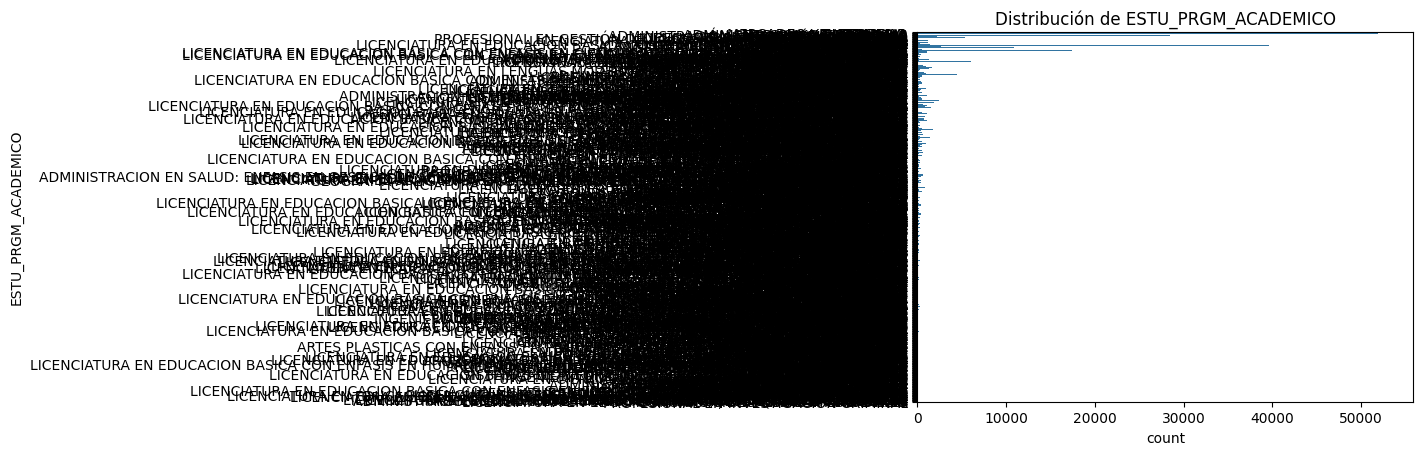

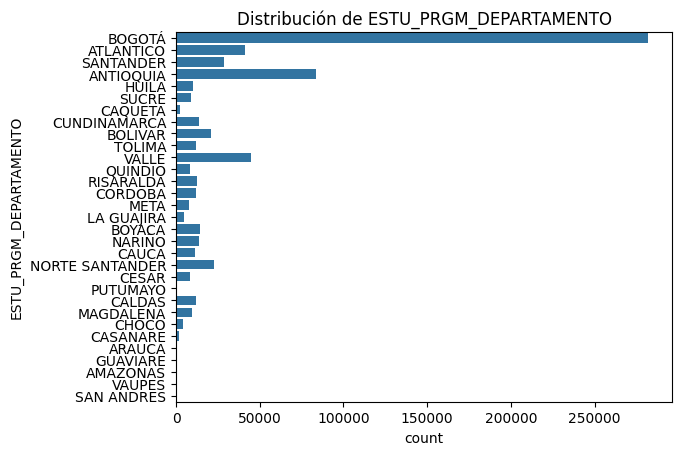

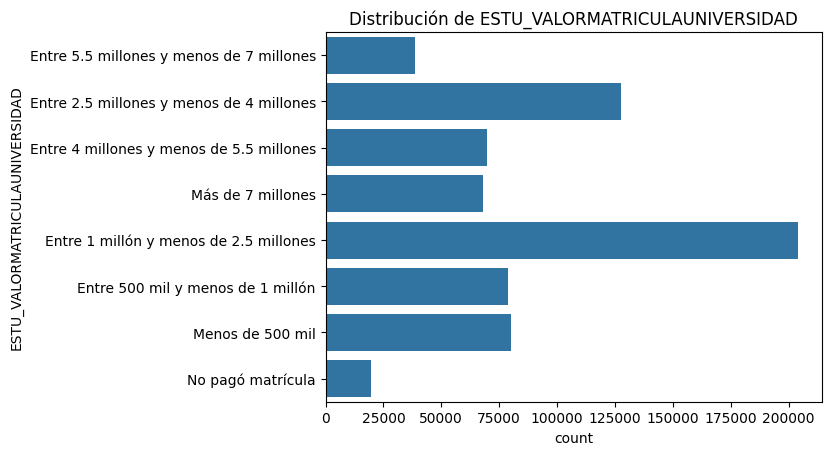

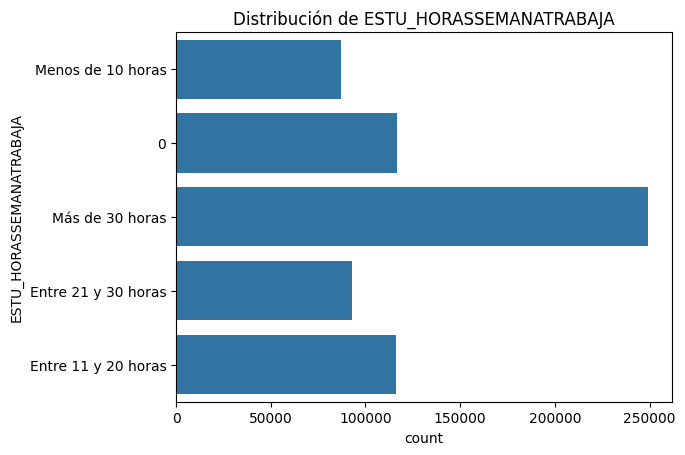

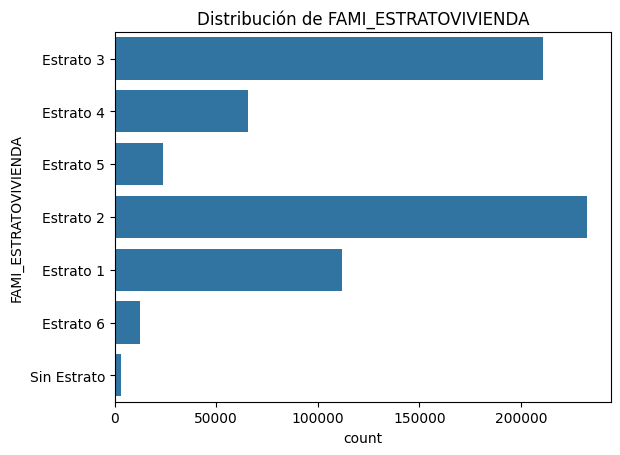

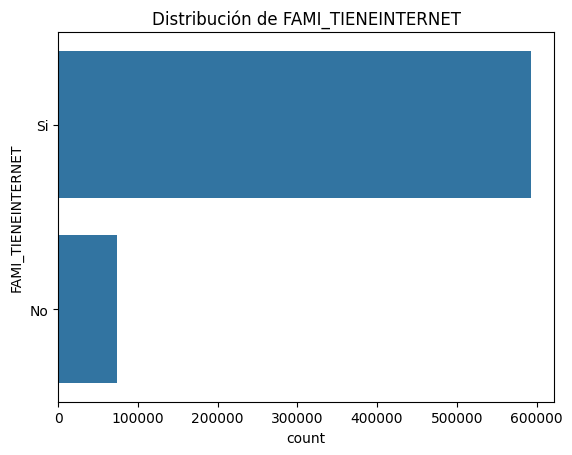

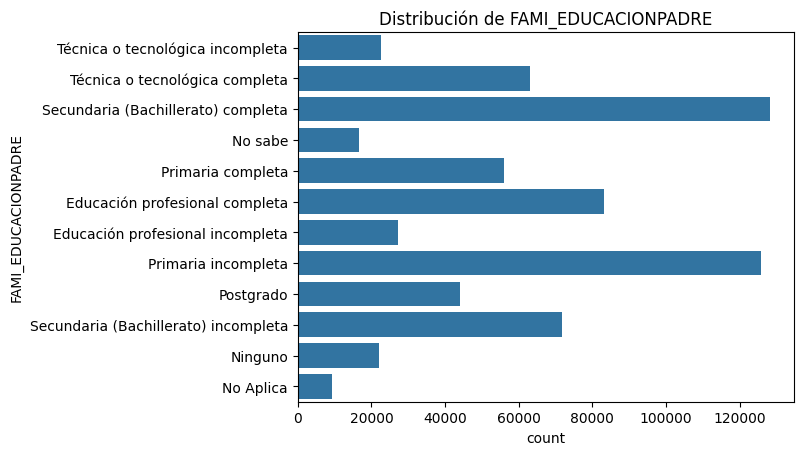

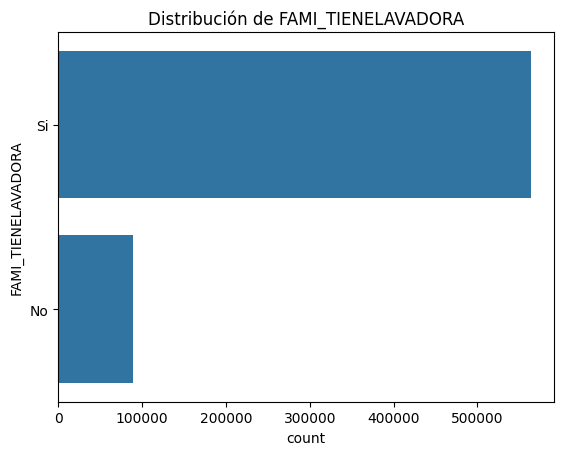

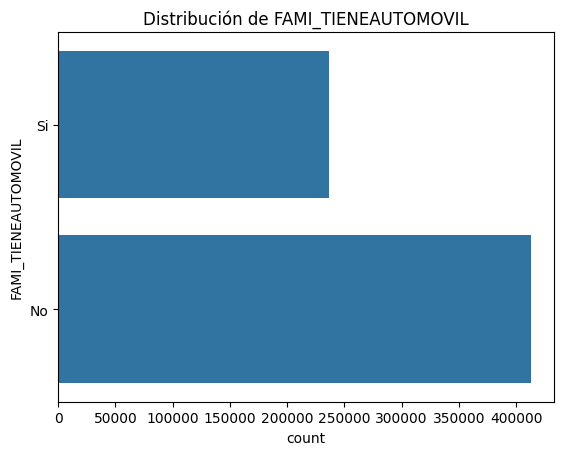

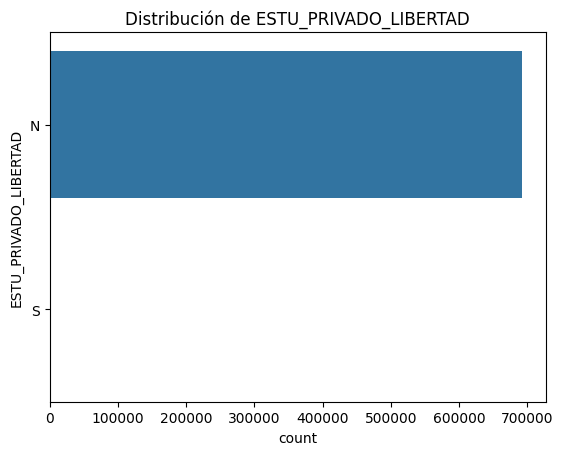

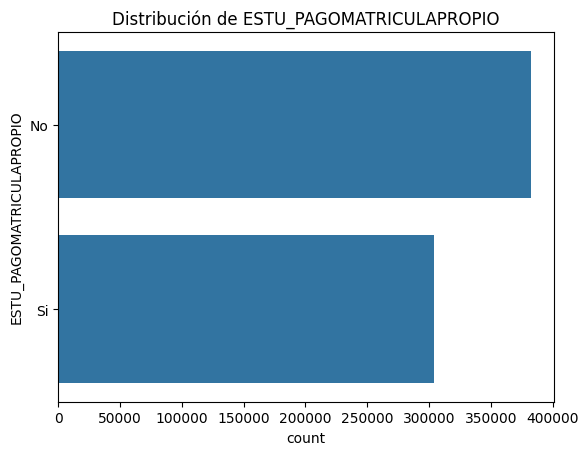

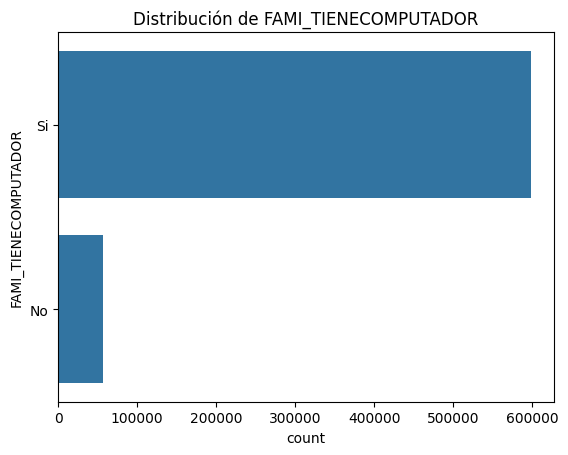

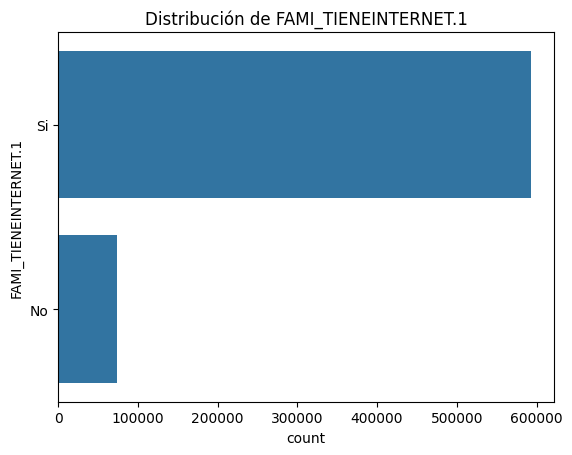

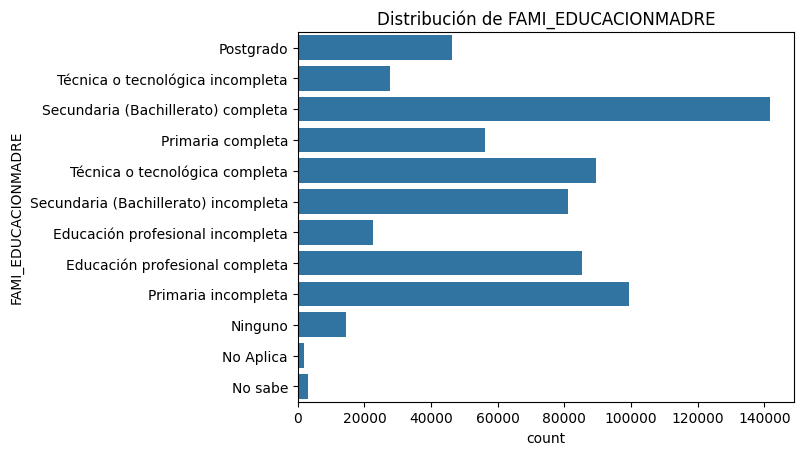

In [ ]:
# Observamos las distribuciones de manera gráfica
for col in data.select_dtypes(include=['object']).columns:
    if col != 'RENDIMIENTO_GLOBAL':
        sns.countplot(y=col, data=data)
        plt.title(f'Distribución de {col}')
        plt.show()

## OBSERVACIONES
Gracias a las distribuciones, podemos notar algunos pasos a realizar durante la limpieza de datos, que sumados a la información de datos vacíos, deberemos realizar en el preprocesado:

- Podemos agrupar programas, debido a que hay tantos programas academicos en la lista, podemos agrupar los que menor cantidad tienen ya que dan muy poca información.

- Podemos agrupar algunos departamentos, ya que algunos no dan tanta información debido a la poca población procediente de estos.

- Podemos descartar la columna "ESTU_PRIVADO_LIBERTAD", ya que no da ninguna información.

- Podemos descartar la columna "FAMI_TIENENINTERNET.1", ya que es información redundante.

- Podemos separar columnas de variables categoricas nominales y variables categoricas ordinales.

# Preprocesado

## Ahora limpiaremos un poco el DataFrame principal

In [ ]:
# Primero, organizando las columnas, donde la información del estudiante irá primero a la información de la familia, descartando directamente los datos innecesarios y separando las columnas ID y rendimiento global.

estudiante_cols = ['PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_PAGOMATRICULAPROPIO', 'ESTU_HORASSEMANATRABAJA']
familia_cols = ['FAMI_ESTRATOVIVIENDA', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENEINTERNET', 'FAMI_TIENECOMPUTADOR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE']

dataID = data['ID']
rendimiento = data["RENDIMIENTO_GLOBAL"]
data_df = data[estudiante_cols + familia_cols]
data_df # Este será nuestro dataframe principal, con el cual iniciaremos todos los pasos a seguir

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_PAGOMATRICULAPROPIO,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE
0,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,No,Menos de 10 horas,Estrato 3,Si,Si,Si,Si,Técnica o tecnológica incompleta,Postgrado
1,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,No,0,Estrato 3,Si,No,No,Si,Técnica o tecnológica completa,Técnica o tecnológica incompleta
2,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,No,Más de 30 horas,Estrato 3,Si,No,Si,No,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa
3,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,No,0,Estrato 4,Si,No,Si,Si,No sabe,Secundaria (Bachillerato) completa
4,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,No,Entre 21 y 30 horas,Estrato 3,Si,Si,Si,Si,Primaria completa,Primaria completa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Si,Entre 11 y 20 horas,Estrato 2,Si,No,Si,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta
692496,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,No,Más de 30 horas,Estrato 3,Si,No,Si,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta
692497,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Si,Menos de 10 horas,Estrato 3,Si,No,Si,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta
692498,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Si,Menos de 10 horas,Estrato 1,No,No,No,Si,Primaria completa,Primaria completa


Categorías de rendimiento global: 4 
              CONTEO
RENDIMIENTO        
alto         175619
bajo         172987
medio-bajo   172275
medio-alto   171619


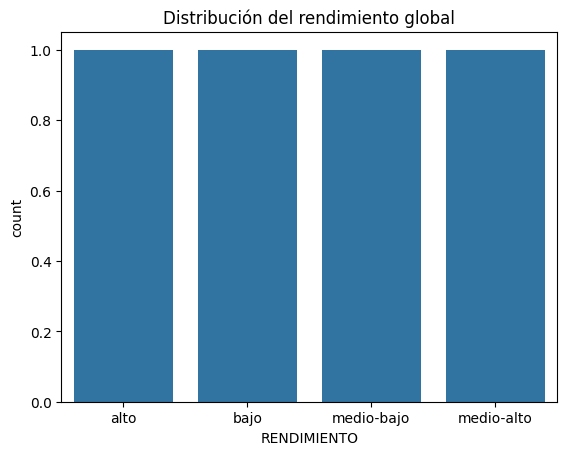

In [ ]:
# Inspeccionamos la variable a analizar y a estudiar

# Vemos cuantos valores unicos tenemos en esta columna de RENDIMIENTO_GLOBAL
rendimiento_values = rendimiento.value_counts().reset_index()
rendimiento_values.columns = ["RENDIMIENTO", "CONTEO"]
rendimiento_values.set_index('RENDIMIENTO', inplace=True)
print("Categorías de rendimiento global:",len(rendimiento_values),"\n",rendimiento_values)

# Graficar visualización de estos datos
sns.countplot(x='RENDIMIENTO', data=rendimiento_values)
plt.title('Distribución del rendimiento global')
plt.show()

In [ ]:
# Convertir la columna periodo a tipo string
data_df['PERIODO'] = data_df['PERIODO'].astype(str)
print(data_df['PERIODO'].dtype)
data_df # Observamos que no nos modifico el dataFrame

object


<ipython-input-15-fa9281e1a9d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['PERIODO'] = data_df['PERIODO'].astype(str)


,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_PAGOMATRICULAPROPIO,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE
0,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,No,Menos de 10 horas,Estrato 3,Si,Si,Si,Si,Técnica o tecnológica incompleta,Postgrado
1,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,No,0,Estrato 3,Si,No,No,Si,Técnica o tecnológica completa,Técnica o tecnológica incompleta
2,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,No,Más de 30 horas,Estrato 3,Si,No,Si,No,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa
3,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,No,0,Estrato 4,Si,No,Si,Si,No sabe,Secundaria (Bachillerato) completa
4,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,No,Entre 21 y 30 horas,Estrato 3,Si,Si,Si,Si,Primaria completa,Primaria completa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Si,Entre 11 y 20 horas,Estrato 2,Si,No,Si,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta
692496,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,No,Más de 30 horas,Estrato 3,Si,No,Si,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta
692497,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Si,Menos de 10 horas,Estrato 3,Si,No,Si,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta
692498,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Si,Menos de 10 horas,Estrato 1,No,No,No,Si,Primaria completa,Primaria completa


## Empezamos organizando las variables categoricas ordinales

Nuestras categorías ordinales son las siguientes:

- PERIODO
- VALOR DE PAGO DE MATRICULA
- HORAS TRABAJADAS A LA SEMANA
- ESTRATO DE LA VIVIENDA
- NIVEL DE EDUCACIÓN DEL PADRE
- NIVEL DE EDUCACIÓN DE LA MADRE


In [ ]:
# Periodo: analizando los valores únicos y el orden a darle
v_u_periodo = data_df['PERIODO'].unique()

# Mostrar los valores únicos
print(v_u_periodo)

# Observando anteriormente, la categoría periodo no tiene valores nulos a llenar

# Codificamos la columna periodo
# Crear un diccionario de mapeo para asignar valores numéricos a cada categoría
periodo_codes = {'20183':0, '20184':1, '20194':2, '20195':3, '20196':4, '20202':5, '20203':6, '20212':7, '20213':8}

# Aplicar el mapeo a la columna
data_df['PERIODO_ENCODED'] = data_df['PERIODO'].map(periodo_codes)

data_df = data_df.drop('PERIODO', axis=1)
data_df

['20212' '20203' '20195' '20183' '20194' '20213' '20184' '20202' '20196']


<ipython-input-16-7d587f42953a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['PERIODO_ENCODED'] = data_df['PERIODO'].map(periodo_codes)


,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_PAGOMATRICULAPROPIO,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,PERIODO_ENCODED
0,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,No,Menos de 10 horas,Estrato 3,Si,Si,Si,Si,Técnica o tecnológica incompleta,Postgrado,7
1,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,No,0,Estrato 3,Si,No,No,Si,Técnica o tecnológica completa,Técnica o tecnológica incompleta,7
2,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,No,Más de 30 horas,Estrato 3,Si,No,Si,No,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,6
3,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,No,0,Estrato 4,Si,No,Si,Si,No sabe,Secundaria (Bachillerato) completa,3
4,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,No,Entre 21 y 30 horas,Estrato 3,Si,Si,Si,Si,Primaria completa,Primaria completa,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Si,Entre 11 y 20 horas,Estrato 2,Si,No,Si,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,3
692496,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,No,Más de 30 horas,Estrato 3,Si,No,Si,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,7
692497,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Si,Menos de 10 horas,Estrato 3,Si,No,Si,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,0
692498,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Si,Menos de 10 horas,Estrato 1,No,No,No,Si,Primaria completa,Primaria completa,3


In [ ]:
# Valor de pago de matricula: analizando los valores únicos y el orden a darle
# Dado que esta columna si tiene valores nulos, debemos llenar estos, para el caso de pago de matricula lo haremos con el valor más frecuente
# Encontrar el valor más frecuente (moda)
valor_mas_frecuente = data_df['ESTU_VALORMATRICULAUNIVERSIDAD'].mode()[0]

# Llenar los valores nulos con el valor más frecuente
data_df['ESTU_VALORMATRICULAUNIVERSIDAD'] = data_df['ESTU_VALORMATRICULAUNIVERSIDAD'].fillna(valor_mas_frecuente)
valores_unicos = data_df['ESTU_VALORMATRICULAUNIVERSIDAD'].unique()

# Mostrar los valores únicos
print(valores_unicos)

# Crear un diccionario de mapeo para asignar valores numéricos a cada categoría
matricula_codes = {
    'Menos de 500 mil': 0,
    'Entre 500 mil y menos de 1 millón': 1,
    'Entre 1 millón y menos de 2.5 millones': 2,
    'Entre 2.5 millones y menos de 4 millones': 3,
    'Entre 4 millones y menos de 5.5 millones': 4,
    'Entre 5.5 millones y menos de 7 millones': 5,
    'Más de 7 millones': 6,
    'No pagó matrícula': 7
}

# Aplicar el mapeo a la columna
data_df['PAGOMATRICULA_ENCODED'] = data_df['ESTU_VALORMATRICULAUNIVERSIDAD'].map(matricula_codes)

data_df = data_df.drop('ESTU_VALORMATRICULAUNIVERSIDAD', axis=1)
data_df

['Entre 5.5 millones y menos de 7 millones'
 'Entre 2.5 millones y menos de 4 millones'
 'Entre 4 millones y menos de 5.5 millones' 'Más de 7 millones'
 'Entre 1 millón y menos de 2.5 millones'
 'Entre 500 mil y menos de 1 millón' 'Menos de 500 mil'
 'No pagó matrícula']


,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_PAGOMATRICULAPROPIO,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,PERIODO_ENCODED,PAGOMATRICULA_ENCODED
0,ENFERMERIA,BOGOTÁ,No,Menos de 10 horas,Estrato 3,Si,Si,Si,Si,Técnica o tecnológica incompleta,Postgrado,7,5
1,DERECHO,ATLANTICO,No,0,Estrato 3,Si,No,No,Si,Técnica o tecnológica completa,Técnica o tecnológica incompleta,7,3
2,MERCADEO Y PUBLICIDAD,BOGOTÁ,No,Más de 30 horas,Estrato 3,Si,No,Si,No,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,6,3
3,ADMINISTRACION DE EMPRESAS,SANTANDER,No,0,Estrato 4,Si,No,Si,Si,No sabe,Secundaria (Bachillerato) completa,3,4
4,PSICOLOGIA,ANTIOQUIA,No,Entre 21 y 30 horas,Estrato 3,Si,Si,Si,Si,Primaria completa,Primaria completa,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,BIOLOGIA,LA GUAJIRA,Si,Entre 11 y 20 horas,Estrato 2,Si,No,Si,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,3,1
692496,PSICOLOGIA,NORTE SANTANDER,No,Más de 30 horas,Estrato 3,Si,No,Si,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,7,3
692497,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Si,Menos de 10 horas,Estrato 3,Si,No,Si,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,0,2
692498,PSICOLOGIA,TOLIMA,Si,Menos de 10 horas,Estrato 1,No,No,No,Si,Primaria completa,Primaria completa,3,3


In [ ]:
# Horas trabajadas a la semana: analizando los valores únicos y el orden a darle
# Dado que esta columna si tiene valores nulos, debemos llenar estos, para el caso de pago de matricula lo haremos con el valor más frecuente
# Encontrar el valor más frecuente (moda)
valor_mas_frecuente = data_df['ESTU_HORASSEMANATRABAJA'].mode()[0]

# Llenar los valores nulos con el valor más frecuente
data_df['ESTU_HORASSEMANATRABAJA'] = data_df['ESTU_HORASSEMANATRABAJA'].fillna(valor_mas_frecuente)
valores_unicos = data_df['ESTU_HORASSEMANATRABAJA'].unique()

# Mostrar los valores únicos
print(valores_unicos)

horas_trabajadas_codes = {
    '0': 0,
    'Menos de 10 horas': 1,
    'Entre 11 y 20 horas': 2,
    'Entre 21 y 30 horas': 3,
    'Más de 30 horas': 4
}

# Aplicar el mapeo a la columna
data_df['HORASTRABAJO_ENCODED'] = data_df['ESTU_HORASSEMANATRABAJA'].map(horas_trabajadas_codes)

data_df = data_df.drop('ESTU_HORASSEMANATRABAJA', axis=1)
data_df

['Menos de 10 horas' '0' 'Más de 30 horas' 'Entre 21 y 30 horas'
 'Entre 11 y 20 horas']


,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_PAGOMATRICULAPROPIO,FAMI_ESTRATOVIVIENDA,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,PERIODO_ENCODED,PAGOMATRICULA_ENCODED,HORASTRABAJO_ENCODED
0,ENFERMERIA,BOGOTÁ,No,Estrato 3,Si,Si,Si,Si,Técnica o tecnológica incompleta,Postgrado,7,5,1
1,DERECHO,ATLANTICO,No,Estrato 3,Si,No,No,Si,Técnica o tecnológica completa,Técnica o tecnológica incompleta,7,3,0
2,MERCADEO Y PUBLICIDAD,BOGOTÁ,No,Estrato 3,Si,No,Si,No,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,6,3,4
3,ADMINISTRACION DE EMPRESAS,SANTANDER,No,Estrato 4,Si,No,Si,Si,No sabe,Secundaria (Bachillerato) completa,3,4,0
4,PSICOLOGIA,ANTIOQUIA,No,Estrato 3,Si,Si,Si,Si,Primaria completa,Primaria completa,7,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,BIOLOGIA,LA GUAJIRA,Si,Estrato 2,Si,No,Si,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,3,1,2
692496,PSICOLOGIA,NORTE SANTANDER,No,Estrato 3,Si,No,Si,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,7,3,4
692497,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Si,Estrato 3,Si,No,Si,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,0,2,1
692498,PSICOLOGIA,TOLIMA,Si,Estrato 1,No,No,No,Si,Primaria completa,Primaria completa,3,3,1


In [ ]:
# Estrato de la vivienda: analizando los valores únicos y el orden a darle
# Dado que esta columna si tiene valores nulos, debemos llenar estos, para el caso de pago de matricula lo haremos con el valor más frecuente
# Encontrar el valor más frecuente (moda)
valor_mas_frecuente = data_df['FAMI_ESTRATOVIVIENDA'].mode()[0]

# Llenar los valores nulos con el valor más frecuente
data_df['FAMI_ESTRATOVIVIENDA'] = data_df['FAMI_ESTRATOVIVIENDA'].fillna(valor_mas_frecuente)
valores_unicos = data_df['FAMI_ESTRATOVIVIENDA'].unique()

# Mostrar los valores únicos
print(valores_unicos)

estratos_codes = {
    'Sin Estrato': 0,
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6
}

# Aplicar el mapeo a la columna
data_df['ESTRATO_ENCODED'] = data_df['FAMI_ESTRATOVIVIENDA'].map(estratos_codes)

data_df = data_df.drop('FAMI_ESTRATOVIVIENDA', axis=1)
data_df

['Estrato 3' 'Estrato 4' 'Estrato 5' 'Estrato 2' 'Estrato 1' 'Estrato 6'
 'Sin Estrato']


,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,PERIODO_ENCODED,PAGOMATRICULA_ENCODED,HORASTRABAJO_ENCODED,ESTRATO_ENCODED
0,ENFERMERIA,BOGOTÁ,No,Si,Si,Si,Si,Técnica o tecnológica incompleta,Postgrado,7,5,1,3
1,DERECHO,ATLANTICO,No,Si,No,No,Si,Técnica o tecnológica completa,Técnica o tecnológica incompleta,7,3,0,3
2,MERCADEO Y PUBLICIDAD,BOGOTÁ,No,Si,No,Si,No,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,6,3,4,3
3,ADMINISTRACION DE EMPRESAS,SANTANDER,No,Si,No,Si,Si,No sabe,Secundaria (Bachillerato) completa,3,4,0,4
4,PSICOLOGIA,ANTIOQUIA,No,Si,Si,Si,Si,Primaria completa,Primaria completa,7,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,BIOLOGIA,LA GUAJIRA,Si,Si,No,Si,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,3,1,2,2
692496,PSICOLOGIA,NORTE SANTANDER,No,Si,No,Si,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,7,3,4,3
692497,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Si,Si,No,Si,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,0,2,1,3
692498,PSICOLOGIA,TOLIMA,Si,No,No,No,Si,Primaria completa,Primaria completa,3,3,1,1


In [ ]:
# Educación del padre y de la madre: analizando los valores únicos y el orden a darle
# Dado que esta columna si tiene valores nulos, debemos llenar estos, para el caso de pago de matricula lo haremos con el valor más frecuente
# Encontrar el valor más frecuente (moda)
valor_mas_frecuente = data_df['FAMI_EDUCACIONPADRE'].mode()[0]

# Llenar los valores nulos con el valor más frecuente de la educación del padre
data_df['FAMI_EDUCACIONPADRE'] = data_df['FAMI_EDUCACIONPADRE'].fillna(valor_mas_frecuente)
valores_unicos_p = data_df['FAMI_EDUCACIONPADRE'].unique()

# Mostrar los valores únicos
print(valores_unicos_p)

valor_mas_frecuente = data_df['FAMI_EDUCACIONMADRE'].mode()[0]

# Llenar los valores nulos con el valor más frecuente
data_df['FAMI_EDUCACIONMADRE'] = data_df['FAMI_EDUCACIONMADRE'].fillna(valor_mas_frecuente)
valores_unicos_m = data_df['FAMI_EDUCACIONMADRE'].unique()

# Mostrar los valores únicos
print(valores_unicos_m)

educacion_codes = {
    'Ninguno': 0,
    'No Aplica': 0,
    'No sabe': 0,
    'Primaria incompleta': 1,
    'Primaria completa': 2,
    'Secundaria (Bachillerato) incompleta': 3,
    'Secundaria (Bachillerato) completa': 4,
    'Técnica o tecnológica incompleta': 5,
    'Técnica o tecnológica completa': 6,
    'Educación profesional incompleta': 7,
    'Educación profesional completa': 8,
    'Postgrado': 9
}

# Aplicar el mapeo a la columna
data_df['PADRE_ENCODED'] = data_df['FAMI_EDUCACIONPADRE'].map(educacion_codes)
data_df['MADRE_ENCODED'] = data_df['FAMI_EDUCACIONMADRE'].map(educacion_codes)

data_df = data_df.drop(['FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE'], axis=1)
data_df

['Técnica o tecnológica incompleta' 'Técnica o tecnológica completa'
 'Secundaria (Bachillerato) completa' 'No sabe' 'Primaria completa'
 'Educación profesional completa' 'Educación profesional incompleta'
 'Primaria incompleta' 'Postgrado' 'Secundaria (Bachillerato) incompleta'
 'Ninguno' 'No Aplica']
['Postgrado' 'Técnica o tecnológica incompleta'
 'Secundaria (Bachillerato) completa' 'Primaria completa'
 'Técnica o tecnológica completa' 'Secundaria (Bachillerato) incompleta'
 'Educación profesional incompleta' 'Educación profesional completa'
 'Primaria incompleta' 'Ninguno' 'No Aplica' 'No sabe']


,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,PERIODO_ENCODED,PAGOMATRICULA_ENCODED,HORASTRABAJO_ENCODED,ESTRATO_ENCODED,PADRE_ENCODED,MADRE_ENCODED
0,ENFERMERIA,BOGOTÁ,No,Si,Si,Si,Si,7,5,1,3,5,9
1,DERECHO,ATLANTICO,No,Si,No,No,Si,7,3,0,3,6,5
2,MERCADEO Y PUBLICIDAD,BOGOTÁ,No,Si,No,Si,No,6,3,4,3,4,4
3,ADMINISTRACION DE EMPRESAS,SANTANDER,No,Si,No,Si,Si,3,4,0,4,0,4
4,PSICOLOGIA,ANTIOQUIA,No,Si,Si,Si,Si,7,3,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,BIOLOGIA,LA GUAJIRA,Si,Si,No,Si,Si,3,1,2,2,4,3
692496,PSICOLOGIA,NORTE SANTANDER,No,Si,No,Si,Si,7,3,4,3,1,3
692497,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Si,Si,No,Si,Si,0,2,1,3,4,3
692498,PSICOLOGIA,TOLIMA,Si,No,No,No,Si,3,3,1,1,2,2


## Ahora organizamos las variables categoricas nominales

Nuestras categorías nominales son las siguientes:
- PROGRAMA ACADEMICO DEL ESTUDIANTE
- DEPARTAMENTO DE PROVENIENCIA DEL ESTUDIANTE
- PAGO PROPIO DE MATRICULA
- EN LA VIVIENDA HAY LAVADORA
- EN LA VIVIENDA HAY AUTOMOVIL
- EN LA VIVIENDA HAY INTERNET
- EN LA VIVIENDA HAY COMPUTADOR

In [ ]:
# Para la categoría de programa academico, realizamos un agrupamiento de los valores que tienen menos de 1000 estudiantes, así logramos reducir el gasto computacional

# Contamos la frecuencia de cada valor único en la columna de programas academicos
programas_freq = data_df['ESTU_PRGM_ACADEMICO'].value_counts()

# creamos un dataframe con los valores que se repiten más de 1000 veces
df_1000 = pd.DataFrame(programas_freq[programas_freq >= 1000].index)

# creamos un mapa para asignar el valor 'otros' a los valores que no se repiten más de 1000 veces
map_otros = {p: 'OTROS' for p in data_df['ESTU_PRGM_ACADEMICO'].unique() if p not in df_1000['ESTU_PRGM_ACADEMICO'].values}

# aplicamos el mapa a la columna 'programas'
data_df['ESTU_PRGM_ACADEMICO'] = data_df['ESTU_PRGM_ACADEMICO'].map(map_otros).fillna(data_df['ESTU_PRGM_ACADEMICO'])
programas_unicos = data_df['ESTU_PRGM_ACADEMICO'].unique()

# Mostrar los valores únicos
print(programas_unicos)

['ENFERMERIA' 'DERECHO' 'MERCADEO Y PUBLICIDAD'
 'ADMINISTRACION DE EMPRESAS' 'PSICOLOGIA' 'MEDICINA VETERINARIA'
 'INGENIERIA MECANICA' 'ADMINISTRACIÓN EN SALUD OCUPACIONAL'
 'INGENIERIA INDUSTRIAL' 'ADMINISTRACIÓN FINANCIERA' 'OTROS'
 'LICENCIATURA EN CIENCIAS SOCIALES' 'LICENCIATURA EN PEDAGOGIA INFANTIL'
 'COMUNICACION SOCIAL' 'CIENCIA POLITICA'
 'PROFESIONAL EN GESTIÓN DE LA SEGURIDAD Y LA SALUD LABORAL'
 'INGENIERIA MECATRONICA' 'TRABAJO SOCIAL' 'INGENIERIA CIVIL'
 'CONTADURIA PÚBLICA' 'ADMINISTRACION EN SALUD'
 'ADMINISTRACIÓN DE EMPRESAS' 'INGENIERIA AGROINDUSTRIAL' 'ZOOTECNIA'
 'SEGURIDAD Y SALUD EN EL TRABAJO' 'MEDICINA' 'CONTADURIA PUBLICA'
 'ODONTOLOGIA' 'DISEÑO INDUSTRIAL' 'ECONOMIA' 'CONTADURÍA PÚBLICA'
 'INGENIERIA DE SISTEMAS' 'ARQUITECTURA' 'ADMINISTRACION FINANCIERA'
 'INGENIERIA ELECTRONICA' 'INGENIERÍA INDUSTRIAL' 'PSICOLOGÍA'
 'INGENIERIA BIOMEDICA' 'ADMINISTRACION Y DIRECCION DE EMPRESAS'
 'LICENCIATURA EN EDUCACIÓN FÍSICA, RECREACIÓN Y DEPORTE'
 'INGENIERIA AMBIE

In [ ]:
# Para la categoria de departamento de proveniencia haremos lo mismo, pero con una frecuencia diferente ya que esta nos da un poco más de información

# Contamos la frecuencia de cada valor único en la columna de departamentos
departamentos_freq = data_df['ESTU_PRGM_DEPARTAMENTO'].value_counts()

# creamos un dataframe con los valores que se repiten más de 1000 veces
df_10000 = pd.DataFrame(departamentos_freq[departamentos_freq >= 10000].index)

# creamos un mapa para asignar el valor 'otros' a los valores que no se repiten más de 1000 veces
map_otros = {p: 'OTROS' for p in data_df['ESTU_PRGM_DEPARTAMENTO'].unique() if p not in df_10000['ESTU_PRGM_DEPARTAMENTO'].values}

# aplicamos el mapa a la columna 'programas'
data_df['ESTU_PRGM_DEPARTAMENTO'] = data_df['ESTU_PRGM_DEPARTAMENTO'].map(map_otros).fillna(data_df['ESTU_PRGM_DEPARTAMENTO'])
departamentos_unicos = data_df['ESTU_PRGM_DEPARTAMENTO'].unique()

# Mostrar los valores únicos
print(departamentos_unicos)

data_df

['BOGOTÁ' 'ATLANTICO' 'SANTANDER' 'ANTIOQUIA' 'OTROS' 'CUNDINAMARCA'
 'BOLIVAR' 'TOLIMA' 'VALLE' 'RISARALDA' 'CORDOBA' 'BOYACA' 'NARIÑO'
 'CAUCA' 'NORTE SANTANDER' 'CALDAS']


,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,PERIODO_ENCODED,PAGOMATRICULA_ENCODED,HORASTRABAJO_ENCODED,ESTRATO_ENCODED,PADRE_ENCODED,MADRE_ENCODED
0,ENFERMERIA,BOGOTÁ,No,Si,Si,Si,Si,7,5,1,3,5,9
1,DERECHO,ATLANTICO,No,Si,No,No,Si,7,3,0,3,6,5
2,MERCADEO Y PUBLICIDAD,BOGOTÁ,No,Si,No,Si,No,6,3,4,3,4,4
3,ADMINISTRACION DE EMPRESAS,SANTANDER,No,Si,No,Si,Si,3,4,0,4,0,4
4,PSICOLOGIA,ANTIOQUIA,No,Si,Si,Si,Si,7,3,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,BIOLOGIA,OTROS,Si,Si,No,Si,Si,3,1,2,2,4,3
692496,PSICOLOGIA,NORTE SANTANDER,No,Si,No,Si,Si,7,3,4,3,1,3
692497,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Si,Si,No,Si,Si,0,2,1,3,4,3
692498,PSICOLOGIA,TOLIMA,Si,No,No,No,Si,3,3,1,1,2,2


In [ ]:
# Para las categorias de 'TIENEAUTOMOVIL' y 'TIENELAVADORA' llenaremos los datos vacios según la probabilidad de que a mayor el estrato, mayor posibilidad hay de que cumplan con la categoría
# Para estratos mayor a 1, se supondrá que sí tienen lavadora
# Para estratos mayor a 3, se supondrá que sí tienen automovil

# Creamos una regla para asignar valores según estrato

estrato_a_automovil = {4: 'Si', 5: 'Si', 6: 'Si', 0: 'No', 1: 'No', 2: 'No', 3: 'No'}
estrato_a_lavadora =  {2: 'Si', 3: 'Si', 4: 'Si', 5: 'Si', 6: 'Si', 0: 'No', 1: 'No'}

# aplicamos la regla a la columna Automovil
data_df['FAMI_TIENEAUTOMOVIL'] = data_df['ESTRATO_ENCODED'].map(estrato_a_automovil).fillna('No')
data_df['FAMI_TIENELAVADORA'] = data_df['ESTRATO_ENCODED'].map(estrato_a_lavadora).fillna('No')
data_df

,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,PERIODO_ENCODED,PAGOMATRICULA_ENCODED,HORASTRABAJO_ENCODED,ESTRATO_ENCODED,PADRE_ENCODED,MADRE_ENCODED
0,ENFERMERIA,BOGOTÁ,No,Si,No,Si,Si,7,5,1,3,5,9
1,DERECHO,ATLANTICO,No,Si,No,No,Si,7,3,0,3,6,5
2,MERCADEO Y PUBLICIDAD,BOGOTÁ,No,Si,No,Si,No,6,3,4,3,4,4
3,ADMINISTRACION DE EMPRESAS,SANTANDER,No,Si,Si,Si,Si,3,4,0,4,0,4
4,PSICOLOGIA,ANTIOQUIA,No,Si,No,Si,Si,7,3,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,BIOLOGIA,OTROS,Si,Si,No,Si,Si,3,1,2,2,4,3
692496,PSICOLOGIA,NORTE SANTANDER,No,Si,No,Si,Si,7,3,4,3,1,3
692497,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Si,Si,No,Si,Si,0,2,1,3,4,3
692498,PSICOLOGIA,TOLIMA,Si,No,No,No,Si,3,3,1,1,2,2


Para el resto de categorías, se volverán a llenar con el dato más común o moda.

In [ ]:
# Encontrar el valor más frecuente (moda)
valor_mas_frecuente = data_df['FAMI_TIENEINTERNET'].mode()[0]

# Llenar los valores nulos con el valor más frecuente
data_df['FAMI_TIENEINTERNET'] = data_df['FAMI_TIENEINTERNET'].fillna(valor_mas_frecuente)

In [ ]:
# Encontrar el valor más frecuente (moda)
valor_mas_frecuente = data_df['FAMI_TIENECOMPUTADOR'].mode()[0]

# Llenar los valores nulos con el valor más frecuente
data_df['FAMI_TIENECOMPUTADOR'] = data_df['FAMI_TIENECOMPUTADOR'].fillna(valor_mas_frecuente)

In [ ]:
# Encontrar el valor más frecuente (moda)
valor_mas_frecuente = data_df['ESTU_PAGOMATRICULAPROPIO'].mode()[0]

# Llenar los valores nulos con el valor más frecuente
data_df['ESTU_PAGOMATRICULAPROPIO'] = data_df['ESTU_PAGOMATRICULAPROPIO'].fillna(valor_mas_frecuente)

In [ ]:
# Comprobamos que no queden valores nulos en el dataframe
missing_values = data_df.isnull().mean() * 100
print(missing_values[missing_values > 0])

Series([], dtype: float64)


## Realizamos la transformación One-Hot Encoding para las categorías nominales

In [ ]:
data_df = pd.get_dummies(data_df, columns=['ESTU_PRGM_ACADEMICO','ESTU_PRGM_DEPARTAMENTO','ESTU_PAGOMATRICULAPROPIO','FAMI_TIENELAVADORA','FAMI_TIENEAUTOMOVIL','FAMI_TIENEINTERNET','FAMI_TIENECOMPUTADOR']).replace({True: 1, False: 0})

## Mostramos el dataframe final

In [ ]:
data_df

,PERIODO_ENCODED,PAGOMATRICULA_ENCODED,HORASTRABAJO_ENCODED,ESTRATO_ENCODED,PADRE_ENCODED,MADRE_ENCODED,ESTU_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS,ESTU_PRGM_ACADEMICO_ADMINISTRACION DE NEGOCIOS,ESTU_PRGM_ACADEMICO_ADMINISTRACION DE NEGOCIOS INTERNACIONALES,ESTU_PRGM_ACADEMICO_ADMINISTRACION EN SALUD,...,ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si,FAMI_TIENELAVADORA_No,FAMI_TIENELAVADORA_Si,FAMI_TIENEAUTOMOVIL_No,FAMI_TIENEAUTOMOVIL_Si,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si,FAMI_TIENECOMPUTADOR_No,FAMI_TIENECOMPUTADOR_Si
0,7,5,1,3,5,9,0,0,0,0,...,1,0,0,1,1,0,0,1,0,1
1,7,3,0,3,6,5,0,0,0,0,...,1,0,0,1,1,0,1,0,0,1
2,6,3,4,3,4,4,0,0,0,0,...,1,0,0,1,1,0,0,1,1,0
3,3,4,0,4,0,4,1,0,0,0,...,1,0,0,1,0,1,0,1,0,1
4,7,3,3,3,2,2,0,0,0,0,...,1,0,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,3,1,2,2,4,3,0,0,0,0,...,0,1,0,1,1,0,0,1,0,1
692496,7,3,4,3,1,3,0,0,0,0,...,1,0,0,1,1,0,0,1,0,1
692497,0,2,1,3,4,3,0,0,0,0,...,0,1,0,1,1,0,0,1,0,1
692498,3,3,1,1,2,2,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1


# Creación del modelo
Empezamos con la creación del modelo, realizaremos diferentes pruebas para observar cuál es el mejor modelo y obtener el archivo final que subiremos a la plataforma Kaggle.

In [ ]:
# Creamos el modelo con los datos de train, ya con estos datos preprocesados, vamos a entrenar diferentes modelos y probar el accuracy de ellos

# Usaremos los siguientes
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [ ]:
rendimiento_codes = {
    "bajo": 0,
    "medio-bajo": 1,
    "medio-alto": 2,
    "alto": 3
}

y = rendimiento.map(rendimiento_codes)
X = data_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.8751768953068592


In [ ]:
# Comprobamos la información en el archivo test y realizamos el mismo preprocesado
data = pd.read_csv('test.csv')
data

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE
0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Si,No,N,Si,Si,Si,Primaria completa
1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Técnica o tecnológica completa
2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa
3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Si,No,N,No,No,No,Primaria incompleta
4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296781,496981,20195,ADMINISTRACION DE EMPRESAS,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 1,Si,Primaria incompleta,Si,Si,N,Si,Si,Si,Primaria incompleta
296782,209415,20183,DERECHO,META,Entre 1 millón y menos de 2.5 millones,0,Estrato 4,Si,Educación profesional completa,Si,No,N,No,Si,Si,Educación profesional completa
296783,239074,20212,DERECHO,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Educación profesional completa
296784,963852,20195,INGENIERIA AERONAUTICA,ANTIOQUIA,Entre 5.5 millones y menos de 7 millones,Entre 11 y 20 horas,Estrato 3,Si,Educación profesional completa,Si,No,N,No,Si,Si,Educación profesional completa


In [ ]:
# Realizamos los mismos procedimientos que realizamos con el set de data test.csv para llegar al DataFrame que entrará en el modelo
print(data.info(),"\n")

# Podemos realizar una exploración un poco más organizada
# ¿Cuantos datos de ID (unicos) se encuentran registrados?
print("En total, tenemos:",data.ID.unique().shape[0],"estudiantes participando.\n")

# Realicemos una revisión por cada columna para observar que datos tenemos disponibles
print("Total de columnas:",len(data.columns))
for col in data.columns:
    print("La columna:",col,"tiene",data[col].count(),"datos registrados")

# Realicemos un conteo de cuantos datos NaN/null tenemos
print("\nEn las siguientes columnas encontramos datos NaN/null:")
for col in data.columns:
  if np.sum(pd.isnull(data[col])) > 0:
    print("La columna:",col,"tiene",np.sum(pd.isnull(data[col])),"datos NaN/null")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296786 entries, 0 to 296785
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              296786 non-null  int64 
 1   PERIODO                         296786 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             296786 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          296786 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  294063 non-null  object
 5   ESTU_HORASSEMANATRABAJA         283407 non-null  object
 6   FAMI_ESTRATOVIVIENDA            282991 non-null  object
 7   FAMI_TIENEINTERNET              285247 non-null  object
 8   FAMI_EDUCACIONPADRE             286793 non-null  object
 9   FAMI_TIENELAVADORA              279527 non-null  object
 10  FAMI_TIENEAUTOMOVIL             277868 non-null  object
 11  ESTU_PRIVADO_LIBERTAD           296786 non-null  object
 12  ESTU_PAGOMATRICULAPROPIO      

In [ ]:
# Primero, organizando las columnas, donde la información del estudiante irá primero a la información de la familia, descartando directamente los datos innecesarios y separando las columnas ID y rendimiento global.

estudiante_cols = ['PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_PAGOMATRICULAPROPIO', 'ESTU_HORASSEMANATRABAJA']
familia_cols = ['FAMI_ESTRATOVIVIENDA', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENEINTERNET', 'FAMI_TIENECOMPUTADOR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE']

dataID_Test = data['ID']
data_df_test = data[estudiante_cols + familia_cols]
data_df_test # Este será nuestro dataframe principal, con el cual iniciaremos todos los pasos a seguir

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_PAGOMATRICULAPROPIO,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE
0,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Si,Menos de 10 horas,Estrato 3,Si,No,Si,Si,Técnica o tecnológica completa,Primaria completa
1,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,No,Entre 21 y 30 horas,Estrato 2,Si,No,Si,Si,Secundaria (Bachillerato) completa,Técnica o tecnológica completa
2,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,No,0,Estrato 3,Si,No,Si,Si,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) completa
3,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,No,Entre 21 y 30 horas,Estrato 1,Si,No,No,No,Primaria incompleta,Primaria incompleta
4,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,No,Entre 11 y 20 horas,Estrato 2,Si,No,Si,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296781,20195,ADMINISTRACION DE EMPRESAS,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Si,Más de 30 horas,Estrato 1,Si,Si,Si,Si,Primaria incompleta,Primaria incompleta
296782,20183,DERECHO,META,Entre 1 millón y menos de 2.5 millones,No,0,Estrato 4,Si,No,Si,Si,Educación profesional completa,Educación profesional completa
296783,20212,DERECHO,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,No,Más de 30 horas,Estrato 3,Si,No,Si,Si,Secundaria (Bachillerato) completa,Educación profesional completa
296784,20195,INGENIERIA AERONAUTICA,ANTIOQUIA,Entre 5.5 millones y menos de 7 millones,No,Entre 11 y 20 horas,Estrato 3,Si,No,Si,Si,Educación profesional completa,Educación profesional completa


In [ ]:
# Convertir la columna periodo a tipo string
data_df_test['PERIODO'] = data_df_test['PERIODO'].astype(str)

# Periodo: analizando los valores únicos y el orden a darle
periodo_codes = {'20183':0, '20184':1, '20194':2, '20195':3, '20196':4, '20202':5, '20203':6, '20212':7, '20213':8}
data_df_test['PERIODO_ENCODED'] = data_df_test['PERIODO'].map(periodo_codes)
data_df_test = data_df_test.drop('PERIODO', axis=1)

# Valor de pago de matricula: analizando los valores únicos y el orden a darle
valor_mas_frecuente = data_df_test['ESTU_VALORMATRICULAUNIVERSIDAD'].mode()[0]
data_df_test['ESTU_VALORMATRICULAUNIVERSIDAD'] = data_df_test['ESTU_VALORMATRICULAUNIVERSIDAD'].fillna(valor_mas_frecuente)
matricula_codes = {
    'Menos de 500 mil': 0,
    'Entre 500 mil y menos de 1 millón': 1,
    'Entre 1 millón y menos de 2.5 millones': 2,
    'Entre 2.5 millones y menos de 4 millones': 3,
    'Entre 4 millones y menos de 5.5 millones': 4,
    'Entre 5.5 millones y menos de 7 millones': 5,
    'Más de 7 millones': 6,
    'No pagó matrícula': 7
}
data_df_test['PAGOMATRICULA_ENCODED'] = data_df_test['ESTU_VALORMATRICULAUNIVERSIDAD'].map(matricula_codes)
data_df_test = data_df_test.drop('ESTU_VALORMATRICULAUNIVERSIDAD', axis=1)

# Horas trabajadas a la semana: analizando los valores únicos y el orden a darle
valor_mas_frecuente = data_df_test['ESTU_HORASSEMANATRABAJA'].mode()[0]
data_df_test['ESTU_HORASSEMANATRABAJA'] = data_df_test['ESTU_HORASSEMANATRABAJA'].fillna(valor_mas_frecuente)
horas_trabajadas_codes = {
    '0': 0,
    'Menos de 10 horas': 1,
    'Entre 11 y 20 horas': 2,
    'Entre 21 y 30 horas': 3,
    'Más de 30 horas': 4
}
data_df_test['HORASTRABAJO_ENCODED'] = data_df_test['ESTU_HORASSEMANATRABAJA'].map(horas_trabajadas_codes)
data_df_test = data_df_test.drop('ESTU_HORASSEMANATRABAJA', axis=1)

# Estrato de la vivienda: analizando los valores únicos y el orden a darle
valor_mas_frecuente = data_df_test['FAMI_ESTRATOVIVIENDA'].mode()[0]
data_df_test['FAMI_ESTRATOVIVIENDA'] = data_df_test['FAMI_ESTRATOVIVIENDA'].fillna(valor_mas_frecuente)
estratos_codes = {
    'Sin Estrato': 0,
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6
}
data_df_test['ESTRATO_ENCODED'] = data_df_test['FAMI_ESTRATOVIVIENDA'].map(estratos_codes)
data_df_test = data_df_test.drop('FAMI_ESTRATOVIVIENDA', axis=1)

# Educación del padre y de la madre: analizando los valores únicos y el orden a darle
valor_mas_frecuente = data_df_test['FAMI_EDUCACIONPADRE'].mode()[0]
data_df_test['FAMI_EDUCACIONPADRE'] = data_df_test['FAMI_EDUCACIONPADRE'].fillna(valor_mas_frecuente)
valor_mas_frecuente = data_df_test['FAMI_EDUCACIONMADRE'].mode()[0]
data_df_test['FAMI_EDUCACIONMADRE'] = data_df_test['FAMI_EDUCACIONMADRE'].fillna(valor_mas_frecuente)

educacion_codes = {
    'Ninguno': 0,
    'No Aplica': 0,
    'No sabe': 0,
    'Primaria incompleta': 1,
    'Primaria completa': 2,
    'Secundaria (Bachillerato) incompleta': 3,
    'Secundaria (Bachillerato) completa': 4,
    'Técnica o tecnológica incompleta': 5,
    'Técnica o tecnológica completa': 6,
    'Educación profesional incompleta': 7,
    'Educación profesional completa': 8,
    'Postgrado': 9
}

data_df_test['PADRE_ENCODED'] = data_df_test['FAMI_EDUCACIONPADRE'].map(educacion_codes)
data_df_test['MADRE_ENCODED'] = data_df_test['FAMI_EDUCACIONMADRE'].map(educacion_codes)

data_df_test = data_df_test.drop(['FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE'], axis=1)

data_df_test

<ipython-input-62-3d26e2bf218f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df_test['PERIODO'] = data_df_test['PERIODO'].astype(str)
<ipython-input-62-3d26e2bf218f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df_test['PERIODO_ENCODED'] = data_df_test['PERIODO'].map(periodo_codes)


,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,PERIODO_ENCODED,PAGOMATRICULA_ENCODED,HORASTRABAJO_ENCODED,ESTRATO_ENCODED,PADRE_ENCODED,MADRE_ENCODED
0,TRABAJO SOCIAL,BOLIVAR,Si,Si,No,Si,Si,0,0,1,3,6,2
1,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,No,Si,No,Si,Si,6,3,3,2,4,6
2,INGENIERIA MECATRONICA,BOGOTÁ,No,Si,No,Si,Si,7,2,0,3,3,4
3,CONTADURIA PUBLICA,SUCRE,No,Si,No,No,No,3,2,3,1,1,1
4,ADMINISTRACION DE EMPRESAS,ATLANTICO,No,Si,No,Si,Si,7,3,2,2,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296781,ADMINISTRACION DE EMPRESAS,BOGOTÁ,Si,Si,Si,Si,Si,3,3,4,1,1,1
296782,DERECHO,META,No,Si,No,Si,Si,0,2,0,4,8,8
296783,DERECHO,BOGOTÁ,No,Si,No,Si,Si,7,3,4,3,4,8
296784,INGENIERIA AERONAUTICA,ANTIOQUIA,No,Si,No,Si,Si,3,5,2,3,8,8


In [ ]:
# Para la categoría de programa academico, realizamos un agrupamiento de los valores asegurando que tenga los mismos valores que el dataframe con el cual montamos el modelo

# Modificar la columna de programas
data_df_test['ESTU_PRGM_ACADEMICO'] = data_df_test['ESTU_PRGM_ACADEMICO'].apply(lambda x: x if x in programas_unicos else 'OTROS')

# Para la categoria de departamento de proveniencia haremos lo mismo

# Modificar la columna de departamentos
data_df_test['ESTU_PRGM_DEPARTAMENTO'] = data_df_test['ESTU_PRGM_DEPARTAMENTO'].apply(lambda x: x if x in departamentos_unicos else 'OTROS')

# Creamos una regla para asignar valores según estrato

estrato_a_automovil = {4: 'Si', 5: 'Si', 6: 'Si', 0: 'No', 1: 'No', 2: 'No', 3: 'No'}
estrato_a_lavadora =  {2: 'Si', 3: 'Si', 4: 'Si', 5: 'Si', 6: 'Si', 0: 'No', 1: 'No'}

# aplicamos la regla a la columna Automovil
data_df_test['FAMI_TIENEAUTOMOVIL'] = data_df_test['ESTRATO_ENCODED'].map(estrato_a_automovil).fillna('No')
data_df_test['FAMI_TIENELAVADORA'] = data_df_test['ESTRATO_ENCODED'].map(estrato_a_lavadora).fillna('No')

# Llenamos los vacios de 'ESTU_PAGOMATRICULAPROPIO'
valor_mas_frecuente = data_df_test['ESTU_PAGOMATRICULAPROPIO'].mode()[0]
data_df_test['ESTU_PAGOMATRICULAPROPIO'] = data_df_test['ESTU_PAGOMATRICULAPROPIO'].fillna(valor_mas_frecuente)

# Llenamos los vacios de 'FAMI_TIENECOMPUTADOR'
valor_mas_frecuente = data_df_test['FAMI_TIENECOMPUTADOR'].mode()[0]
data_df_test['FAMI_TIENECOMPUTADOR'] = data_df_test['FAMI_TIENECOMPUTADOR'].fillna(valor_mas_frecuente)

# Llenamos los vacios de 'FAMI_TIENEINTERNET'
valor_mas_frecuente = data_df_test['FAMI_TIENEINTERNET'].mode()[0]
data_df_test['FAMI_TIENEINTERNET'] = data_df_test['FAMI_TIENEINTERNET'].fillna(valor_mas_frecuente)

data_df_test

,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,PERIODO_ENCODED,PAGOMATRICULA_ENCODED,HORASTRABAJO_ENCODED,ESTRATO_ENCODED,PADRE_ENCODED,MADRE_ENCODED
0,TRABAJO SOCIAL,BOLIVAR,Si,Si,No,Si,Si,0,0,1,3,6,2
1,OTROS,ANTIOQUIA,No,Si,No,Si,Si,6,3,3,2,4,6
2,INGENIERIA MECATRONICA,BOGOTÁ,No,Si,No,Si,Si,7,2,0,3,3,4
3,CONTADURIA PUBLICA,OTROS,No,No,No,No,No,3,2,3,1,1,1
4,ADMINISTRACION DE EMPRESAS,ATLANTICO,No,Si,No,Si,Si,7,3,2,2,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296781,ADMINISTRACION DE EMPRESAS,BOGOTÁ,Si,No,No,Si,Si,3,3,4,1,1,1
296782,DERECHO,OTROS,No,Si,Si,Si,Si,0,2,0,4,8,8
296783,DERECHO,BOGOTÁ,No,Si,No,Si,Si,7,3,4,3,4,8
296784,OTROS,ANTIOQUIA,No,Si,No,Si,Si,3,5,2,3,8,8


In [ ]:
# Realizamos la transformación One-Hot Encoding para las categorías nominales
data_df_test = pd.get_dummies(data_df_test, columns=['ESTU_PRGM_ACADEMICO','ESTU_PRGM_DEPARTAMENTO','ESTU_PAGOMATRICULAPROPIO','FAMI_TIENELAVADORA','FAMI_TIENEAUTOMOVIL','FAMI_TIENEINTERNET','FAMI_TIENECOMPUTADOR']).replace({True: 1, False: 0})
data_df_test

,PERIODO_ENCODED,PAGOMATRICULA_ENCODED,HORASTRABAJO_ENCODED,ESTRATO_ENCODED,PADRE_ENCODED,MADRE_ENCODED,ESTU_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS,ESTU_PRGM_ACADEMICO_ADMINISTRACION DE NEGOCIOS,ESTU_PRGM_ACADEMICO_ADMINISTRACION DE NEGOCIOS INTERNACIONALES,ESTU_PRGM_ACADEMICO_ADMINISTRACION EN SALUD,...,ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si,FAMI_TIENELAVADORA_No,FAMI_TIENELAVADORA_Si,FAMI_TIENEAUTOMOVIL_No,FAMI_TIENEAUTOMOVIL_Si,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si,FAMI_TIENECOMPUTADOR_No,FAMI_TIENECOMPUTADOR_Si
0,0,0,1,3,6,2,0,0,0,0,...,0,1,0,1,1,0,0,1,0,1
1,6,3,3,2,4,6,0,0,0,0,...,1,0,0,1,1,0,0,1,0,1
2,7,2,0,3,3,4,0,0,0,0,...,1,0,0,1,1,0,0,1,0,1
3,3,2,3,1,1,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,7,3,2,2,4,4,1,0,0,0,...,1,0,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296781,3,3,4,1,1,1,1,0,0,0,...,0,1,1,0,1,0,0,1,0,1
296782,0,2,0,4,8,8,0,0,0,0,...,1,0,0,1,0,1,0,1,0,1
296783,7,3,4,3,4,8,0,0,0,0,...,1,0,0,1,1,0,0,1,0,1
296784,3,5,2,3,8,8,0,0,0,0,...,1,0,0,1,1,0,0,1,0,1


In [ ]:
predictions = model.predict(data_df_test)

submission = pd.DataFrame({'ID': dataID_Test, 'RENDIMIENTO_GLOBAL': predictions})

rendimiento_codes = {
    "bajo": 0,
    "medio-bajo": 1,
    "medio-alto": 2,
    "alto": 3
}
rendimiento_codes_inverso = {v: k for k, v in rendimiento_codes.items()}

# Realizar el mapeo inverso
submission['RENDIMIENTO_GLOBAL'] = submission['RENDIMIENTO_GLOBAL'].map(rendimiento_codes_inverso)
submission.to_csv('submission.csv', index=False)

In [ ]:
# subir la submission a Kaggle
!kaggle competitions submit -c udea-ai4eng-20241 -f submission.csv -m "Message"

100% 4.19M/4.19M [00:00<00:00, 6.06MB/s]
Successfully submitted to UDEA/ai4eng 20241 - Pruebas Saber Pro Colombia